k_val: 2
k = 2: distortion = 415317672.07199
 
 
k_val: 2
k = 2: distortion = 83513741.99773444
 
 
k_val: 2
k = 2: distortion = 101332197.12068497
 
 
k_val: 2
k = 2: distortion = 149721830.4883393
 
 
k_val: 2
k = 2: distortion = 89571447.93770319
 
 
k_val: 2
k = 2: distortion = 85402103.2459016
 
 
k_val: 2
k = 2: distortion = 96229780.30130637
 
 
k_val: 2
k = 2: distortion = 105075155.24245581
 
 
k_val: 2
k = 2: distortion = 84789021.41854356
 
 
k_val: 2
k = 2: distortion = 84889130.22317913
 
 
k_val: 2
k = 2: distortion = 107546037.85350245
 
 
k_val: 2
k = 2: distortion = 158733568.0322363
 
 
k_val: 2
k = 2: distortion = 94382815.57869479
 
 
k_val: 2
k = 2: distortion = 123480762.06566048
 
 
k_val: 2
k = 2: distortion = 101305712.8601825
 
 
k_val: 2
k = 2: distortion = 82539948.87268057
 
 
k_val: 2
k = 2: distortion = 811060641.2949777
 
 
k_val: 2
k = 2: distortion = 94248957.14176966
 
 
k_val: 2
k = 2: distortion = 137999663.26549923
 
 
k_val: 2
k = 2: distortion = 

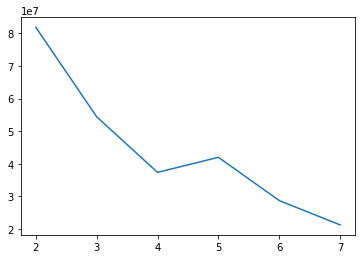

In [ ]:
# K-Means Clustering and Distortion Calculation

# Problem 1 - Clustering with k-means
import sklearn
import numpy
import matplotlib.pyplot as plt

# Problem 1 - 1
# Problem 1 - Question 1

def k_means(dataset, k): # take in an array containing a dataset and value of k

  num_datapoints = len(dataset) # number of datapoints
  d = len(dataset[0]) # number of coordinates

  # Step 1: Initialize Cluster Centroids

  # make an array of size k that contains coordinates of the centroids
  # make the coordinates random within the x and y ranges of the data
  # there needs to be k clusters 30 coordinates for each centroid

  centroid_coords = dataset[numpy.random.randint(0, high=num_datapoints, size=k), :]
  
  # Step 2: Assign each point to one of these centroids
  # now that we know how many points are in the dataset, make an array to store the point and its closest centroid
  p_centroid = numpy.empty([num_datapoints, 2])

  p_count = 0

  for p in dataset: # going through coordinates of dataset

    for x in range(0,k): # ex. for k = 3, it will loop through 0 1 2
      
      # store current distance found between the point in the dataset and a centroid in dist
      dist = numpy.linalg.norm(p - centroid_coords[x])
      
      if (x == 0): # make sure that something gets assigned during the first run
        smallest_dist = dist
        closest_centroid = x + 1

      if (dist < smallest_dist):
        smallest_dist = dist
        closest_centroid = x + 1
      
      # if last round, add a coordinate to p_centroid
      if (x == k - 1):
        p_centroid[p_count, 0] = p_count # store the datapoint number
        p_centroid[p_count, 1] = closest_centroid # store its closest centroid

    p_count = p_count + 1

  
  # Step 3: Update the location of the cluster centroids by computing the mean

  # get all points in one cluster and then calculate the mean of all the coordinates and relocate that cluster to the mean

  num_points_in_cluster = 0
  mean_coords = numpy.zeros((k, d), dtype=float) # initialize array to store means for new cluster coordinates

  count = 0
  for c in range(1,k + 1): # loop through the number of clusters
    # get everything that has the same c from the p_centroid array which matches points to clusters

    for p in p_centroid:

      if p[1] == c: # if the closest cluster is c
        
        # add to array of means for c
   
        mean_coords[c-1] = numpy.add(mean_coords[c-1], dataset[int(p[0])])
        num_points_in_cluster = num_points_in_cluster + 1

      # this all happens after cycling through all the points
      if count == k:

        if num_points_in_cluster == 0:
          mean_coords[c-1] = centroid_coords[c-1]
        else:
          mean_coords[c-1] = numpy.true_divide(mean_coords[c-1],num_points_in_cluster, dtype=float)
          centroid_coords[c-1] = mean_coords[c-1]
          mean_coords = numpy.zeros((k, d), dtype=float)

      count = count + 1
    count = 0
    num_points_in_cluster = 0

# Step 4: Repeat this until the clusters don't change anymore

  previous_centroid_coords = numpy.random.randint(0,10,(k,d)) # choose random numbers

  while (previous_centroid_coords != centroid_coords).any():
    
    previous_centroid_coords = numpy.copy(centroid_coords)

    p_count = 0

    for p in dataset: # going through coordinates of dataset

      for x in range(0,k): # ex. for k = 3, it will loop through 0 1 2
        
        # store current distance found between the point in the dataset and a centroid in dist
        dist = numpy.linalg.norm(p - centroid_coords[x])
                                
        # store smallest distance between the point and a centroid in smallest_dist        
        if (x == 0): # make sure that something gets assigned during the first run
          smallest_dist = dist
          closest_centroid = x + 1

        if (dist < smallest_dist):
          smallest_dist = dist
          closest_centroid = x + 1
        
        # if last round, add a coordinate to p_centroid
        if (x == k - 1):
          p_centroid[p_count, 0] = p_count # store the datapoint number
          p_centroid[p_count, 1] = closest_centroid # store its closest centroid

      p_count = p_count + 1

    
    # Step 3 Repeated: Update the location of the cluster centroids by computing the mean
    # get all points in one cluster and then calculate the mean of all the coordinates and relocate that cluster to the mean

    num_points_in_cluster = 0
    mean_coords = numpy.zeros((k, d), dtype=float) # initialize array to store means for new cluster coordinates

    count = 0
    for c in range(1,k + 1): # loop through the number of clusters
      # get everything that has the same c from the p_centroid array which matches points to clusters

      for p in p_centroid:

        if p[1] == c: # if the closest cluster is c

          mean_coords[c-1] = numpy.add(mean_coords[c-1], dataset[int(p[0])])

          num_points_in_cluster = num_points_in_cluster + 1

        # this all happens after cycling through all the points       
        if count == k:

          if num_points_in_cluster == 0:
            mean_coords[c-1] = centroid_coords[c-1]
          else:
            mean_coords[c-1] = numpy.true_divide(mean_coords[c-1],num_points_in_cluster, dtype=float)
            centroid_coords[c-1] = mean_coords[c-1]
            mean_coords = numpy.zeros((k, d), dtype=float)

        count = count + 1
      count = 0
      num_points_in_cluster = 0

  return (p_centroid, centroid_coords)


from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()['data']



# Distortion Calculation

# find the sum of squared distances of points from cluster centroids

y_vals_temp = numpy.zeros((6,30)) # 6 rows for each k value, and 30 columns to store each distortion
# at the end, pick the minimum distortion from each row to plot for a more accurate result

for k_val in range(2,8):

  for x in range(0,30):
    k = k_means(data, k_val)

    p_centroids_returned = k[0]
    # print("Points and corresponding clusters returned")
    # print(p_centroids_returned)

    centroids_returned = k[1]
    # print("Centroid coordinates returned")
    # print(centroids_returned)

    distortion = 0
    point = 0
    print("k_val: " + str(k_val))

    for p in p_centroids_returned: # going through coordinates of dataset
            
      clust = int(p[1]) - 1
      # store current distance found between the point in the dataset and a centroid in dist
      dist = numpy.linalg.norm(data[point] - centroids_returned[clust]) # to find the distance from the point to the cluster

      dist_squared = dist * dist
      distortion = distortion + dist_squared
      point = point + 1
    
    y_vals_temp[k_val-2][x] = distortion
      
    print("k = " + str(k_val) + ": distortion = " + str(distortion))
    print(" ")
    print(" ")
    
x_vals = numpy.array([2,3,4,5,6,7]) # store the k value
y_vals = numpy.zeros(6) # store the lowest distortion that corresponds to the k value
y_vals = numpy.min(y_vals_temp,1)


print(x_vals)
print(y_vals)
plt.plot(x_vals, y_vals)
plt.show()


